
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=3C99D size=5>
first practical exercise - ICA <br>
<font color=3C99D size=5>
Answer Notebook <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=696880 size=4>
Alireza Malekhosseini
      
____

<font size = 4>
in this notebook you are going to use ICA (or independent component analysis) to solvd a famous problem called blind source localization.
you will learn more about this algorithm in the machine learning course. 

Independent Component Analysis (ICA) is a computational technique for separating a multivariate signal into additive, independent components. ICA is called "Independent Component Analysis" because its goal is to transform a set of observed variables into statistically independent components, each representing a distinct underlying source in the data.

imagine 3 different pictures of three different entities (like a human, an apple and a guitar), and now imagine that these three pictures have been combined together using a mean over all three pictures. now if you have enough (at least 3) of these combined pictures that in each combined pictures, different weights for sources have been used, you can retrive the source images using an ICA algorithm.

- **note that your code in this notebook must be fully reproducible**

### How ICA Works
<font size = 4>
ICA assumes that the observed data are linear mixtures of some unknown independent sources. The objective is to identify both the original sources and the mixing process, even when the sources are not directly observable. ICA typically relies on the statistical property of independence, where each recovered signal is assumed to be non-Gaussian and as independent as possible from the others.

Mathematically, if $\mathbf{X}$ is the observed signal matrix, then the goal of ICA is to find a matrix $\mathbf{W}$ such that:
$\mathbf{S} = \mathbf{W} \cdot \mathbf{X} $
where:
- $\mathbf{X} \in \mathbb{R}^{N \times M}$ is the observed signal in which every row is one of the sample mixed signals. so M is the length of every sample signal.
- $\mathbf{S} \in \mathbb{R}^{C \times M}$ is the matrix of independent components (the separated sources) and C is the number of Components or sources that is to be extracted.
- $\mathbf{W} \in \mathbb{R}^{N \times C}$ is the unmixing matrix of shape that needs to be learned.





<font size = 4>
TODO: seach about different use cases of ICA and write a brief explanation about them here.


<font size = 4>
answer: 

<font size = 4>
do a little research about Non-Gaussianity Maximization used in FastICA and explain its relation to Centeral Limit Theorem.

answer:
Independent Component Analysis (ICA) is a powerful technique used in various fields for separating mixed signals into their independent components. Here are some of the different use cases of ICA:

## Use Cases of ICA

### 1. **Audio Signal Separation**
   - **Description**: ICA is widely used to separate audio signals, such as isolating individual instrument tracks from a mixed audio recording. This is particularly useful in music production and audio restoration.
   - **Example**: The "Cocktail Party Problem" illustrates this, where ICA helps separate multiple speakers' voices from a single mixed audio signal[1][5].

### 2. **Electroencephalogram (EEG) Data Analysis**
   - **Description**: ICA is applied to EEG data to remove artifacts like eye blinks and muscle activity, allowing for cleaner analysis of brain activity.
   - **Example**: Identifying and removing eye blink artifacts from EEG recordings to improve the quality of neurological data[1].

### 3. **Image Processing and Face Recognition**
   - **Description**: ICA can be used in image processing to extract features that are useful for face recognition and other visual tasks.
   - **Example**: Modelling receptive fields of primary visual neurons to enhance image analysis capabilities[5].

### 4. **Communication Systems**
   - **Description**: ICA is applied in communication systems to suppress interference and improve signal quality. For instance, it can be used in CDMA systems to mitigate jamming effects.
   - **Example**: Blind suppression of interference caused by bit-pulsed jamming in CDMA communication systems[3].

### 5. **Financial Analysis**
   - **Description**: ICA can be used to analyze financial data, such as predicting stock prices by identifying independent factors influencing market trends.
   - **Example**: Predicting stock prices based on independent components extracted from financial data[5].

### 6. **Biological Signal Processing**
   - **Description**: ICA is used in biological signal processing to separate mixed signals from different sources, such as neuronal spike sorting.
   - **Example**: Sorting neuronal spikes to understand neural activity patterns[5].

These use cases demonstrate the versatility of ICA in handling complex data across various domains.

Citations:
[1] https://towardsdatascience.com/the-power-of-independent-component-analysis-ica-on-real-world-applications-egg-example-48df336a1bd8?gi=1a733bd88276
[2] https://abler.nttdata.com/en/solution/c07.html
[3] http://research.ics.aalto.fi/ica/biennial2001-3.pdf
[4] https://www.indeed.com/career-advice/career-development/list-of-use-cases-examples
[5] https://en.wikipedia.org/wiki/Independent_component_analysis
[6] https://www.techtarget.com/searchsoftwarequality/definition/use-case
[7] https://www.researchgate.net/publication/7872389_Independent_component_analysis_An_introduction
[8] https://www.wrike.com/blog/what-is-a-use-case/

## Introduction to FastICA

<font size = 4>
FastICA is a popular and efficient algorithm for performing ICA. It is based on a fixed-point iteration scheme and aims to find the independent components more quickly than traditional methods. FastICA is widely used because it converges faster and is computationally more efficient.


<font size = 4>
do a little research about Non-Gaussianity Maximization used in FastICA and explain its relation to Centeral Limit Theorem.

answer:

## Non-Gaussianity Maximization in FastICA

**Independent Component Analysis (ICA)** is a computational technique used to separate a multivariate signal into additive, independent components. A key principle behind ICA is the maximization of **non-Gaussianity**, which is essential for effectively identifying the underlying independent sources from mixed signals. FastICA is one of the most popular algorithms for achieving this, leveraging approximations to negentropy as a measure of non-Gaussianity.

### Understanding Non-Gaussianity

Non-Gaussianity refers to the degree to which a probability distribution deviates from a Gaussian distribution. In the context of ICA, the assumption is that the source signals are non-Gaussian. This is crucial because, according to the **Central Limit Theorem (CLT)**, the sum of independent random variables tends to be Gaussian regardless of their original distribution. Therefore, if the observed data (mixed signals) were purely Gaussian, it would be impossible to distinguish between the original sources since any rotation or transformation would yield similar distributions.

### Relation to Central Limit Theorem

The Central Limit Theorem states that as more independent random variables are added together, their normalized sum tends toward a Gaussian distribution. This implies that if we have multiple independent sources, their linear combination (as seen in mixed signals) will often appear more Gaussian than any individual source. Consequently, if all sources were Gaussian, ICA would struggle to identify them because any linear combination would also be Gaussian, leading to an infinite number of potential solutions (rotations) that do not uniquely identify the original sources.

To successfully apply ICA and separate the mixed signals, at least one of the sources must exhibit non-Gaussian characteristics. FastICA achieves this by maximizing a measure of non-Gaussianity—specifically through an approximation of **negentropy**—to recover these independent components.

### FastICA Algorithm

FastICA operates by iteratively adjusting an un-mixing matrix $$ W $$ to maximize non-Gaussianity. The algorithm can be summarized in the following steps:

1. **Centering**: Subtract the mean from each signal to ensure zero mean.
2. **Whitening**: Transform the data such that it has unit variance and is uncorrelated.
3. **Maximization**: Use a fixed-point iteration method to maximize an approximation of negentropy $$ J(y) $$, which can be expressed as:
   $$
   J(y) = \mathbb{E}\{G(y)\} - \mathbb{E}\{G(v)\}^2
   $$
   where $$ G $$ is a non-quadratic function chosen based on its ability to measure non-Gaussianity (e.g., $$ G(u) = \log(\cosh(u)) $$) and $$ v $$ represents a standard normal variable[1][2][5].

### Conclusion

In summary, non-Gaussianity maximization in FastICA is intrinsically linked to the Central Limit Theorem. By focusing on non-Gaussian signals, FastICA can effectively separate mixed signals into their independent components, overcoming the limitations imposed by Gaussian distributions. This methodology allows for practical applications in various fields such as audio signal processing and biomedical signal analysis, where distinguishing between overlapping sources is crucial.

Citations:
[1] https://hbenbel.github.io/blog/fastica/
[2] https://www.phil.cmu.edu/tetrad-javadocs/7.5.0/edu/cmu/tetrad/search/FastIca.html
[3] https://stats.stackexchange.com/questions/351294/what-is-meant-by-the-non-gaussianity-in-the-independent-component-analysis-ica
[4] https://www.cambridge.org/core/books/abs/independent-component-analysis/fast-ica-by-a-fixedpoint-algorithm-that-maximizes-nongaussianity/FA46BF320248836E1445F1524CB830D2
[5] https://search.r-project.org/CRAN/refmans/fastICA/html/fastICA.html
[6] https://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_ICA09.pdf
[7] https://bernstein-network.de/wp-content/uploads/2021/03/Lecture-16-Independent-component-analysis-2020.pdf
[8] https://dsp.stackexchange.com/questions/71903/a-question-about-ica-and-non-gaussianity
[9] https://www.tqmp.org/RegularArticles/vol06-1/p031/p031.pdf
[10] https://genet.univ-tours.fr/gen002200/bibliographie/biblio_complete_juin2008/Differentially%20expressed%20gene/Independent%20component%20analysis%20A%20tutorial.pdf

<font size=4>
in this notebook we are going to use FastICA algorithm for a blind source localization task on audio files. the audio files are placed in the data folder beside the notebook.
    
the algorithm has been fully explained the the wikipedia page bellow and we're going to implement the exact algorithm here in this notebook.\
<a href="https://en.wikipedia.org/wiki/FastICA" style="font-size:20px; color:#3d2b1f;">FastICA Wikipedia Page</a>


In [75]:
import numpy as np
from numpy.linalg import eigh

import matplotlib.pyplot as plt
import soundfile as sf

from scipy.io import wavfile
from scipy.signal import resample
from sklearn.decomposition import FastICA
from IPython.display import Audio

In [76]:
def plotSounds(sound_list, name_list, samplerate):
	"""Plots the sounds as a time series data"""

	times = np.arange(len(sound_list[0]))/float(samplerate)

	fig = plt.figure(figsize=(15,4))
	imageCoordinate = 100 + 10*len(sound_list) + 1
	i = 0

	for sound in sound_list:
		fig.add_subplot(imageCoordinate)
		plt.fill_between(times, sound, color='k')
		plt.xlim(times[0], times[-1])
		plt.title(name_list[i])
		plt.xlabel('time (s)')
		plt.ylabel('amplitude')
		# plt.axis("off")
		plt.plot(sound)

		imageCoordinate += 1
		i += 1

	plt.show()

In [77]:
# TODO: at first load the mixed audio files in the sounds folder and put them together using vstack function from numpy to form the X matrix explained above
rate1, data1 = wavfile.read('sounds/mixed1.wav')
rate2, data2 = wavfile.read('sounds/mixed2.wav')
rate3, data3 = wavfile.read('sounds/mixed3.wav')
min_length = min(len(data1), len(data2), len(data3))
data1, data2, data3 = data1[:min_length], data2[:min_length], data3[:min_length]
X = np.vstack((data1, data2, data3))

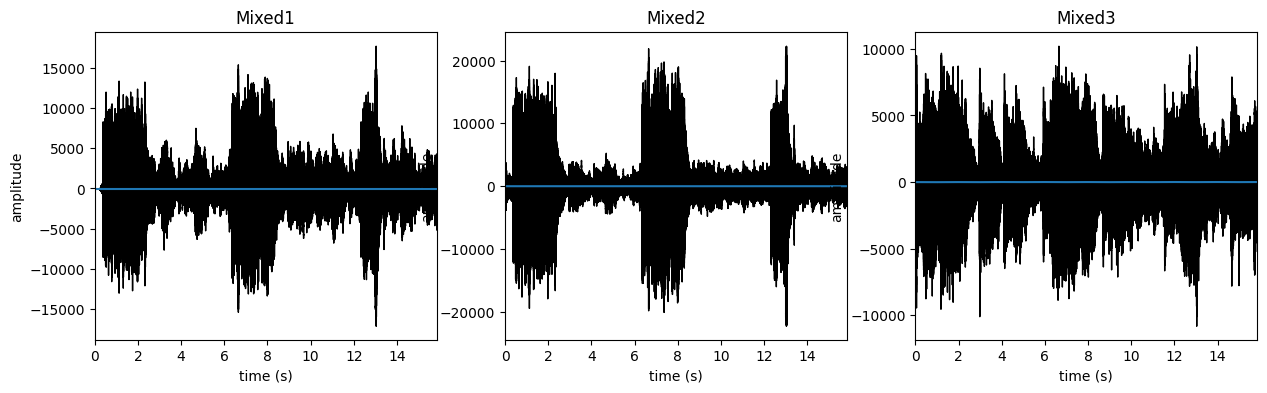

In [78]:
# TODO plot the mixed signals using the plot function.
plotSounds([X[0], X[1], X[2]], ['Mixed1', 'Mixed2', 'Mixed3'], rate1)


In [79]:
#TODO play the first two  using IPython.display class
display(Audio(X[0], rate=rate1))

display(Audio(X[1], rate=rate1))


## prewhitening the data

<font size = 3>
first you should shift every mixed sample signal to a zero mean. after this step the mean of every row of the data must be zero.


In [80]:
X_centered = None

## whitening the data

<font size = 4>
before performing FastICA algorithm first we need to do whiten the data. this mean applying a linear transformation on the data so that without 

Whitening is a preprocessing step used to transform data so that the resulting variables are uncorrelated and have unit variance. In simpler terms, whitening decorrelates the features and normalizes them to have the same scale. When data is zero-centered, whitening makes the covariance matrix of the data an identity matrix.


#### **Covariance Matrix**:
The covariance matrix is a key concept in whitening. For a zero-centered dataset $X$ with $n$ samples and $d$ features, the covariance matrix $C$ is computed as:
<p style="text-align:center;font-size:24px">$C = \frac{1}{n} X^T X$</p>



Where:
- $\mathbf{X}$ is the $n \times d$ data matrix (rows are samples, columns are features).
- $\mathbf{X^T}$ is the transpose of $\mathbf{X}$.

The covariance matrix $\mathbf{C}$ describes how the features in the data vary with each other. Each element $\mathbf{C_ij}$ of the covariance matrix represents the covariance between the $i$-th and $j$-th signals.

#### 3. **Whitening Transformation**:
Whitening modifies the data so that its covariance matrix becomes the **identity matrix**. In the identity matrix, the diagonal entries are all 1 (indicating unit variance for each feature), and the off-diagonal entries are 0 (indicating no correlation between features).

To achieve this, we use **eigenvalue decomposition** (EVD) or **singular value decomposition** (SVD) to decompose the covariance matrix. we know that these two decompositions are the same if the matrix is symmetric and positive semidefinite, and hence the covariance matrix meets both criteria, it has the same SVD and EVD decomposition.

The covariance matrix $C$ can be decomposed as:
<p style="text-align:center;font-size:24px">$C = V \Lambda V^T$</p>


Where:
- $V$ is a matrix of eigenvectors (orthogonal basis of the data space).
- $\Lambda$ is a diagonal matrix of eigenvalues, representing the variance along the principal directions.

Whitening involves transforming the data using the eigenvalues and eigenvectors from this decomposition:

<p style="text-align:center;font-size:24px">$X_{\text{whitened}} = \Lambda^{-\frac{1}{2}} V^T X$</p>




Where:
- $\Lambda^{-\frac{1}{2}}$ is the inverse square root of the eigenvalue matrix, which normalizes the data by the variance in each principal direction. (we know that all the eigenvalues of the covariance matrix are nonnegative.)
- $V^T$ aligns the data with the new orthogonal basis, and $\Lambda^{-\frac{1}{2}}$ scales it.

### How Whitening Works
- **Data decorrelation**: The eigenvalue decomposition aligns the data along the directions where the variance is highest. These directions are the eigenvectors of the covariance matrix.
- **Normalization**: After the alignment, the eigenvalue matrix $\Lambda$ scales the data by the variance in each direction. By multiplying by the inverse square root of $\Lambda$, the variances are normalized to 1, leading to unit variance along each axis.

### Covariance Matrix After Whitening

Once the data is whitened, the covariance matrix of the whitened data becomes the **identity matrix**:



<p style="text-align:center;font-size:24px">$\text{Cov}(X_{\text{whitened}}) = I$</p>


This means:
- The features are uncorrelated (off-diagonal elements are zero).
- The variance of each feature is 1 (diagonal elements are one).

#### Covariance Proof After Whitening:

TODO: Given the whitening transformation $X_{\text{whitened}} = X V \Lambda^{-\frac{1}{2}}$, prove that the covariance matrix of the whitened data is equal to Identity matrix

answer: To prove that the covariance matrix of the whitened data is equal to the identity matrix, let's follow these steps:

### Whitening Transformation

Given the whitening transformation:
$$ X_{\text{whitened}} = \Lambda^{-\frac{1}{2}} V^T X $$

Here, $$ V $$ is the matrix of eigenvectors, and $$ \Lambda $$ is the diagonal matrix of eigenvalues of the covariance matrix $$ C = V \Lambda V^T $$.

### Covariance Matrix of Whitened Data

The covariance matrix of the whitened data $$ X_{\text{whitened}} $$ is given by:
$$ \text{Cov}(X_{\text{whitened}}) = \frac{1}{n} X_{\text{whitened}}^T X_{\text{whitened}} $$

Substituting the whitening transformation:
$$ \text{Cov}(X_{\text{whitened}}) = \frac{1}{n} (\Lambda^{-\frac{1}{2}} V^T X)^T (\Lambda^{-\frac{1}{2}} V^T X) $$

$$ = \frac{1}{n} X^T V \Lambda^{-\frac{1}{2}} \Lambda^{-\frac{1}{2}} V^T X $$

$$ = \frac{1}{n} X^T V \Lambda^{-1} V^T X $$

### Simplification Using Covariance Matrix

Recall that the original covariance matrix is:
$$ C = \frac{1}{n} X^T X = V \Lambda V^T $$

Substituting this into the equation for the covariance of the whitened data:
$$ \text{Cov}(X_{\text{whitened}}) = V \Lambda V^T V \Lambda^{-1} V^T $$

Since $$ V^T V = I $$ (because $$ V $$ is orthogonal), we have:
$$ \text{Cov}(X_{\text{whitened}}) = V \Lambda \Lambda^{-1} V^T $$

$$ = V I V^T $$

$$ = V V^T $$

Since $$ V $$ is orthogonal, $$ V V^T = I $$, which means:
$$ \text{Cov}(X_{\text{whitened}}) = I $$

### Conclusion

Thus, the covariance matrix of the whitened data is indeed the identity matrix, confirming that the features are uncorrelated and have unit variance.


### Computing $\Lambda^{-1/2}$ and $X^{-1/2}$ (although not used here)
<font size=4>
we know that the covariance matrix is a positive semi-definite matrix. you can check out the proof in this link: 
<a href="https://math.stackexchange.com/questions/114072/what-is-the-proof-that-covariance-matrices-are-always-semi-definite" style="font-size:20px; color:#3d2b1f;">Proof that the Covariance matrix is PSD</a>


For a positive semi-definite matrix, instead of the inverse, we can compute the **Moore-Penrose pseudoinverse** of the square root, which involves taking the reciprocal of only the non-zero eigenvalues.

In this case, the decomposition $X = Q \Lambda Q^T$ is still used, but we construct $\Lambda^{-1/2}$ such that:

$\Lambda^{-1/2} = \text{diag} \left( 
\begin{cases} 
\frac{1}{\sqrt{\lambda_i}} & \text{if } \lambda_i > 0, \\
0 & \text{if } \lambda_i = 0 
\end{cases} 
\right)$

The resulting matrix $Y = X^{-1/2}$ defined by: $X^{-1/2} = Q \Lambda^{-1/2} Q^T$ is a well-defined pseudoinverse square root for X.


based on the above explanation complete the cell bellow to define the whitening function. do not use any of the np.linalg functions for computing $\Lambda^{-1/2}$

In [81]:
import numpy as np  

def whitenMatrix(matrix):  
    """Whiten the input matrix X such that the covariance matrix approximates the identity matrix."""  
    
    # Step 1: Compute the covariance matrix  
    cov_matrix = np.cov(matrix, rowvar=True)  # Assuming columns are features, rows are observations  

    # Step 2: Eigenvalue decomposition  
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  

    # Step 3: Create diagonal matrix D from eigenvalues  
    D = np.diag(eigenvalues)  

    # Step 4: Compute D^(-1/2)  
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigenvalues))  

    # Ensure no zero eigenvalues to avoid division by zero  
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0  # If any eigenvalue is zero, replace with zero to avoid infinities  

    # Step 5: Whiten the matrix using the transformation E * D^(-1/2) * transpose(E) * X  
    # E is the eigenvector matrix and the transformation is E * D^(-1/2) * transpose(E)  
    whiten_transformation = eigenvectors @ D_inv_sqrt @ eigenvectors.T  
    
    # Apply the transformation  
    whiteMatrix = whiten_transformation @ matrix  

    # Optionally, verify the covariance of the whitened matrix is approximately the identity  

    return whiteMatrix

In [82]:
# TODO: whiten the centered data using the whitenMatrix function
X_centered = X - np.mean(X, axis=1, keepdims=True)  
centered_audio_array=X_centered
# Optional: Print to verify centering  
print("Mean of centered X (should be close to zero):", np.mean(X_centered))  

# Step 3: Whiten the centered data using the whitenMatrix function  
X_whitened = whitenMatrix(X_centered)
whitened_cov_matrix = np.cov(X_whitened, rowvar=True)
print(whitened_cov_matrix)  

# Optionally, print the shape of the whitened data  
print("Shape of the whitened matrix X_whitened:", X_whitened.shape) 

Mean of centered X (should be close to zero): -1.4354398702224246e-17
[[ 1.00000000e+00  1.47153063e-14 -1.79761863e-15]
 [ 1.47153063e-14  1.00000000e+00  1.40488698e-15]
 [-1.79761863e-15  1.40488698e-15  1.00000000e+00]]
Shape of the whitened matrix X_whitened: (3, 506880)


### The FastICA algorithm
<font size=4>

Once the data is whitened, we can apply the FastICA algorithm on it. complete the bellow cell to implement the FastICA algorithm for sorce localization of a mixed sound. the algorithm is exactly provided in this page: 
<a href="https://en.wikipedia.org/wiki/FastICA" style="font-size:20px; color:#3d2b1f;">FastICA Wikipedia Page</a>. check out the multi-component extraction and try to implement it here. 





In [83]:
import numpy as np  

class FastICA:  
    def __init__(self, n_components, eps=1e-5, max_iter=1000):  
        """  
        FastICA implementation for Independent Component Analysis.  
        param n_components: Number of independent components to extract.  
        param eps: Convergence tolerance.  
        param max_iter: Maximum number of iterations.  
        """  
        self.n_components = n_components  
        self.eps = eps  
        self.max_iter = max_iter  
        self.vectors = []  

    def f0(self, input):  
        """Activation function: Hyperbolic tangent."""  
        return np.tanh(input)  

    def f1(self, input):  
        """Derivative of the activation function."""  
        return 1 - self.f0(input) ** 2  

    def f2(self, input):  
        """Second derivative of f0"""  
        return -2 * np.tanh(input)  * (1 - np.tanh(input)  ** 2)  

    def fit_transform(self, data):  
        """  
        Perform FastICA to extract independent components.  
        param data: Input matrix, assumed to be centered and whitened (n_samples, n_features).  
        return: Independent components matrix.  
        """  
        n_samples, n_features = data.shape  
        W_matrix = np.zeros((self.n_components, n_samples))  
        
        for idx in range(self.n_components):  
            initial_w = np.random.rand(n_samples)  
            initial_w = initial_w /np.linalg.norm(initial_w)  
            
            for _ in range(self.max_iter):  
                score = np.dot(initial_w.T, data)  
                non_stationary = data @ self.f0(score) / n_features - np.mean(self.f1(score)) * initial_w  
                
                for component in range(idx):  
                    non_stationary -= np.dot(non_stationary, W_matrix[component]) * W_matrix[component]  # Gram-Schmidt deflation  
                
                non_stationary /= np.linalg.norm(non_stationary)  
                
                if np.abs(np.dot(initial_w.T, non_stationary)) > (1 - self.eps):  
                    break  
                initial_w = non_stationary  
            
            W_matrix[idx, :] = initial_w  
        
        S_matrix = np.dot(W_matrix, data)  
        return W_matrix, S_matrix

In [84]:
X = whitenMatrix(X_centered)

# make an instance of the FastICA class
ica = FastICA(n_components=3)

# Extract 3 independent components
W, S = ica.fit_transform(X)

print("Weight matrix W shape:", W.shape)
print("Independent components S shape:", S.shape)

Weight matrix W shape: (3, 3)
Independent components S shape: (3, 506880)


<font size = 4>
now play the sources extracted by the FastICA algorithm using the IPython library and also compute the cosine similarity between these sources and display it

In [85]:
# TODO plot the mixed signals using the plot function.


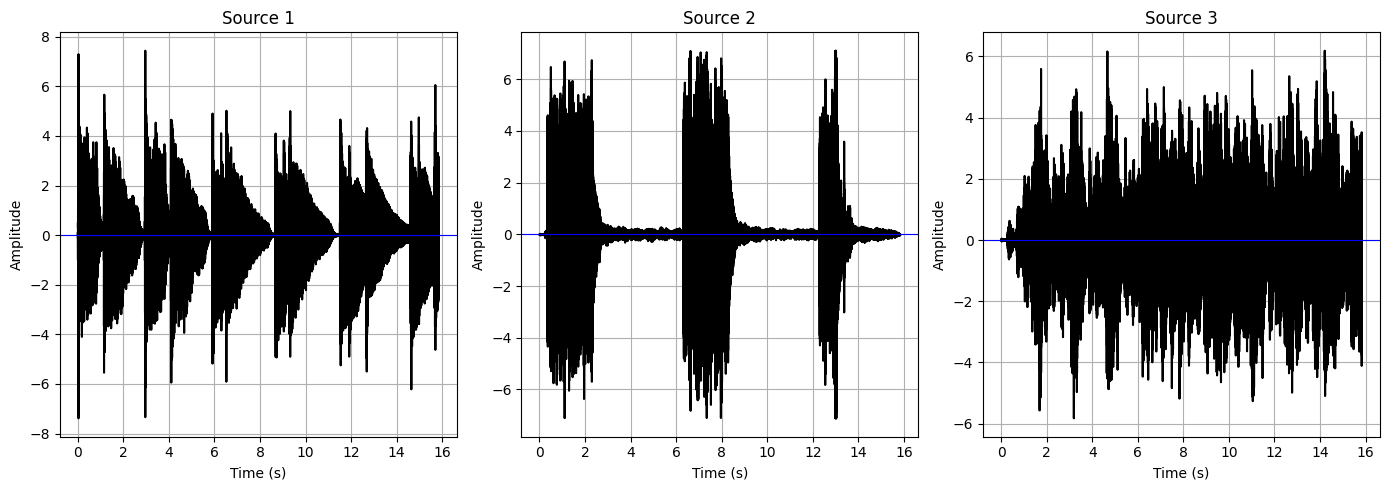

In [86]:


def plot_sources(independent_components, sample_rate, titles):  
    """  
    Plots independent components with specific titles.  

    Parameters:  
        independent_components (numpy.ndarray): The independent components (shape: [n_components, n_samples]).  
        sample_rate (int): Sample rate of the signals.  
        titles (list of str): Titles for each independent component.  
    """  
    n_components = independent_components.shape[0]  
    duration = independent_components.shape[1] / sample_rate  
    time = np.linspace(0, duration, independent_components.shape[1])  

    plt.figure(figsize=(14, 5))  

    for i in range(n_components):  
        plt.subplot(1, n_components, i + 1)  
        plt.plot(time, independent_components[i], color='black')  
        plt.title(titles[i])  
        plt.xlabel('Time (s)')  
        plt.ylabel('Amplitude')  
        plt.axhline(y=0, color='blue', linewidth=0.8)  # Horizontal line at y=0  
        plt.grid(True)  

    plt.tight_layout()  
    plt.show()  



# Now plot using the result from FastICA  
plot_sources(S, rate1, ['Source 1', 'Source 2', 'Source 3'])

In [87]:
audio_sources = [Audio(S[i], rate=rate1) for i in range(S.shape[0])]  
for i, audio in enumerate(audio_sources):  
    display(audio)  # This will display an audio player for each source  
    
from sklearn.metrics.pairwise import cosine_similarity  

# Compute cosine similarity between the sources  
similarity_matrix = cosine_similarity(S)  
print("Cosine similarity matrix:\n", similarity_matrix) 

Cosine similarity matrix:
 [[ 1.00000000e+00  3.89780083e-15 -1.00949861e-14]
 [ 3.89780083e-15  1.00000000e+00 -1.03451463e-14]
 [-1.00949861e-14 -1.03451463e-14  1.00000000e+00]]


In [88]:
# TODO: play the third source